In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Nov  3 18:48:59 2019
@author: Olivier THUAL

How will the bore propagate ?
Data assimilation with two informations linked by G

"""
#  clear all
for iglob in list(globals().keys()):
    if(iglob[0] != '_'):
        exec('del {}'.format(iglob))
# import libraries
import numpy as np
import matplotlib.pyplot as plt
              

plt.close('all')

def cG_nol(x):
    # Observation operator
    y=-q/(x-hL)
    return y

def G_lin(x):
    # Observation operator
    cGp=q/(x-hL)**2
    return cGp

def inifig(xaxe=0,yaxe=0,xlab='x',ylab='y'):
    plt.figure()
    plt.axvline(xaxe)
    plt.axhline(yaxe)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel(xlab,fontsize=16 )
    plt.ylabel(ylab,fontsize=16)
    
def Jb_cost(x):
    return (x-xb)**2/(2*sigb**2)
 
def Jr_cost(x):
    return (yo-cG_nol(x))**2/(2*sigr**2)

def Jrinc_cost(x):
    d=yo-cG_nol(xb); G=G_lin(xb)
    return (d-G*(x-xb))**2/(2*sigr**2)

def Jinc_cost(x):
    return Jb_cost(x)+Jrinc_cost(x)

def J_cost(x):
    return Jb_cost(x)+Jr_cost(x)


def improve(Nc):
    # Counting if T2 improves the analysis
    count=0
    for i in range(Nc) :
        xb=xt+np.random.normal(0,sigb)
        yo=yt+np.random.normal(0,sigr)
        G=G_lin(xb)
        K=(G/sigr**2)/(1/sigb**2+G**2/sigr**2)
        d=yo-cG_nol(xb)
        xa=xb+K*d     
        if abs(xb-xt) < abs(xa-xt) :
            count=count+1
    
    rho=count/Nc
    return rho    

# Parameters
q, hL = 500, 10 # Flux, height Left
xt=17; yt=cG_nol(xt) # True state
sigb=1;  sigr=1; 
print('sig=',sigb,'sigr=',sigr)

# Plotting the cost functions
if True :
    R=10
    xmin=15; xmax=19; 
    x=np.linspace(xmin,xmax,100)
    for r in range(R):
        # Background and Measurement
        xb=xt+np.random.normal(0,sigb)
        yo=yt+np.random.normal(0,sigr)
        inifig(xaxe=xmin,ylab='J')
        # True state
        plt.scatter(xt,0,marker='^',color='blue',s=100)
        # plotting Jb
        Jb=Jb_cost(x)
        plt.plot(x,Jb,color='green')
        plt.scatter(xb,0,marker='o',color='green',s=100)
        Jb=J_cost(xb)
        plt.scatter(xb,Jb,marker='s',color='green',s=100)
        plt.plot([xb,xb],[0,Jb],color='green')
        # plotting Jr
        Jr=Jr_cost(x)
        plt.plot(x,Jr,color='magenta')
        xo=hL-q/yo
        plt.scatter(xo,0,marker='o',color='magenta',s=100)
        # plotting Jrinc
        Jrinc=Jrinc_cost(x)
        Jrincb=Jrinc_cost(xb)
        plt.plot(x,Jrinc,color='magenta',linestyle='dashed')
        plt.scatter(xb,Jrincb,marker='s',color='magenta',s=100)
        # plotting J
        J=J_cost(x)
        ixa=np.argmin(J); xa=x[ixa]; Ja=J[ixa]
        plt.plot(x,J,color='red')
        plt.scatter(xa,Ja,marker='o',color='red',s=100)
        plt.scatter(xa,0,marker='o',color='red',s=100)
        plt.plot([xa,xa],[0,Ja],color='red')
        # plotting Jinc
        Jinc=Jinc_cost(x)
        ixainc=np.argmin(Jinc); xainc=x[ixainc]; 
        Jainc=Jinc_cost(xainc)
        plt.plot(x,Jinc,linestyle='dashed',color='red')
        plt.scatter(xainc,Jainc,marker='^',color='red',s=100)
        plt.scatter(xainc,0,marker='^',color='red',s=100)
        plt.plot([xainc,xainc],[0,Jainc],color='red',linestyle='dashed')
        # Bound and save
        ymin=-.3; ymax=3
        plt.ylim(ymin,ymax) 
        print('======= Experiment'+str(r)+' =======')
      
        plt.savefig('cost'+str(r)+'.pdf')
        plt.show(); plt.close()

# Counting the improvements
if True :
    
    rho=(improve(1000000))
    print('=================================')
    print('Rate of improvemennts rho=',rho) #à quelle fréquence l'assimilation de données permet d'améliorer la précision?
    print('=================================')


# Scores for the estimation of sigma_a
if True :
    Rmax=10000; scormea=[]; scorsig=[] 
    
    for R in np.arange(2,Rmax+1) :
        xb=xt+np.random.normal(0,sigb,R)
        yo=yt+np.random.normal(0,sigr,R)
        G=G_lin(xb)
        K=(G/sigr**2)/(1/sigb**2+G**2/sigr**2)
        d=yo-cG_nol(xb)
        xa=xb+K*d
        E=np.sum(xa)/R
        V=np.sum((xa-xt)**2)/R
        sigaR=np.sqrt(V)
        smea=(E-xt)/sigb;
        ssig=(sigb-sigaR)/sigb;
        scormea=np.append(scormea,smea)
        scorsig=np.append(scorsig,ssig)
    # mean
    inifig(xaxe=0,yaxe=0,xlab='$R$',ylab='$(x^a-x^t)/\sigma_b$')
    plt.plot(scormea,color='blue')
    plt.title('Estimation of $x^t$',fontsize=16)
    #plt.ylim(-.1,.2)   
    plt.savefig('scormea.pdf')
    # siga
    inifig(xaxe=0,yaxe=0,xlab='$R$',ylab='($\sigma_a-\sigma_b)/\sigma_b$')
    plt.plot(scorsig,color='red')
    plt.title('Estimation of $\sigma_a$',fontsize=16)
    #plt.ylim(0,.5)   
    plt.savefig('scorvar.pdf')
    
# Show all figures in command line model
print("Close all figures to stop the program")
plt.show()

On s'intéresse dans cette partie à la mesure de la hauteur d'eau dans un ressaut. La relation théorique issue de la conservation de la masse donne : W = -Hl*Ul/(Hr-Hl). On suppose q=Hl Ul connu sans erreur et Hr avec un écart type de σb. Par ailleurs, on mesure W avec une erreur d'écart type σb.

L'opérateur d'observation est défini par y = -Hl*Ul/(x-Hl). On peut le linéariser autour de xb de la façon suivante : y = -q/(xb-Hl) + (x-xb)*q/(xb_Hl)^2.

La linéarisation est utilisée pour l'écriture de la fonction coût qu'il faut minimiser : J(x) = Jb(x) + Jr(x).

Le code permet de tracer la figure des fonctions coûts :
- avec en vert Jb
- en bleu l'état vrai
- en magenta trait plein Jr
- en magenta trait pointillé Jr linéarisé
- en rouge trait plein J calculé avec J
- en rouge trait pointillé J calculé avec la linéarisation de Jr

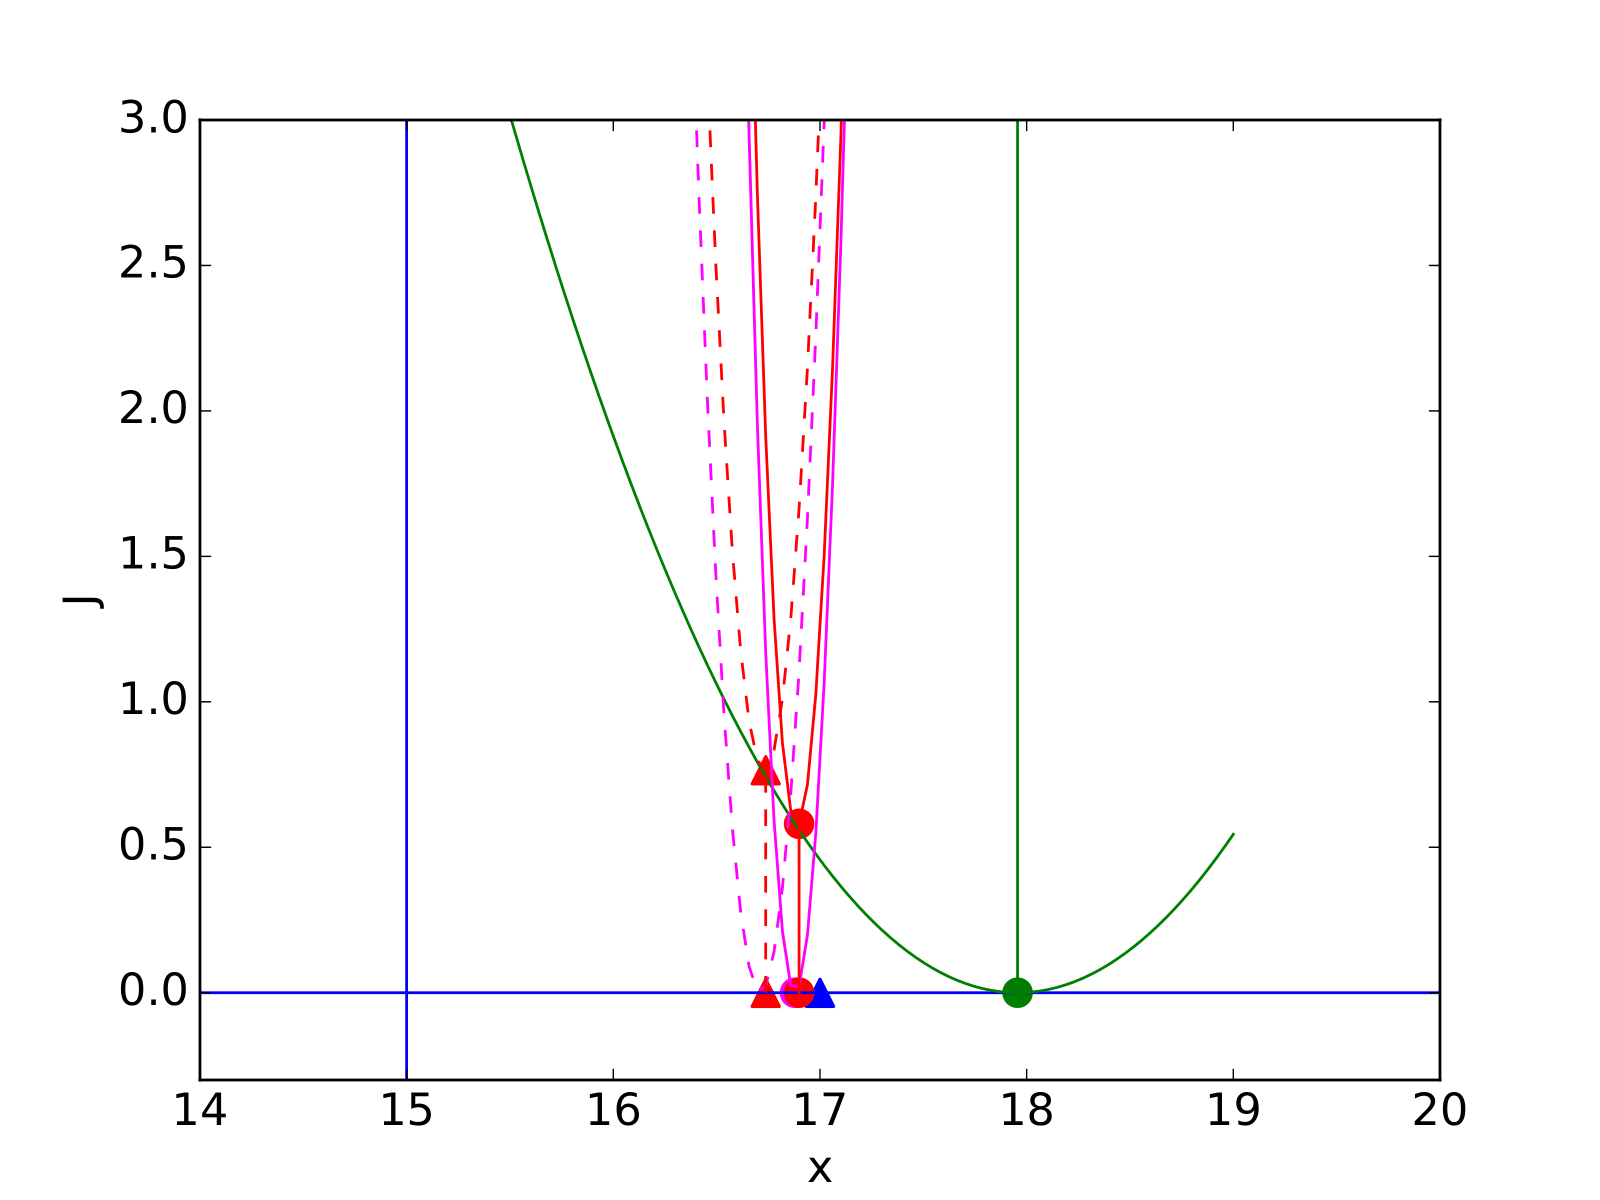


On peut également tracer l'évolution de la variation relative entre l'état vrai et les analyses en fonction du nombre de réalisations.

Pour comparer différentes situations, on fait varier les variance σb et σr:

Cas 1 : σb = 1 et σr = 1

Cas 2 : σb = 1 et σr = 5 

Cas 3 : σb = 1 et σr = 10 

Cas 4 : σb = 5 et σr = 1 

Cas 5 : σb = 10 et σr = 1 

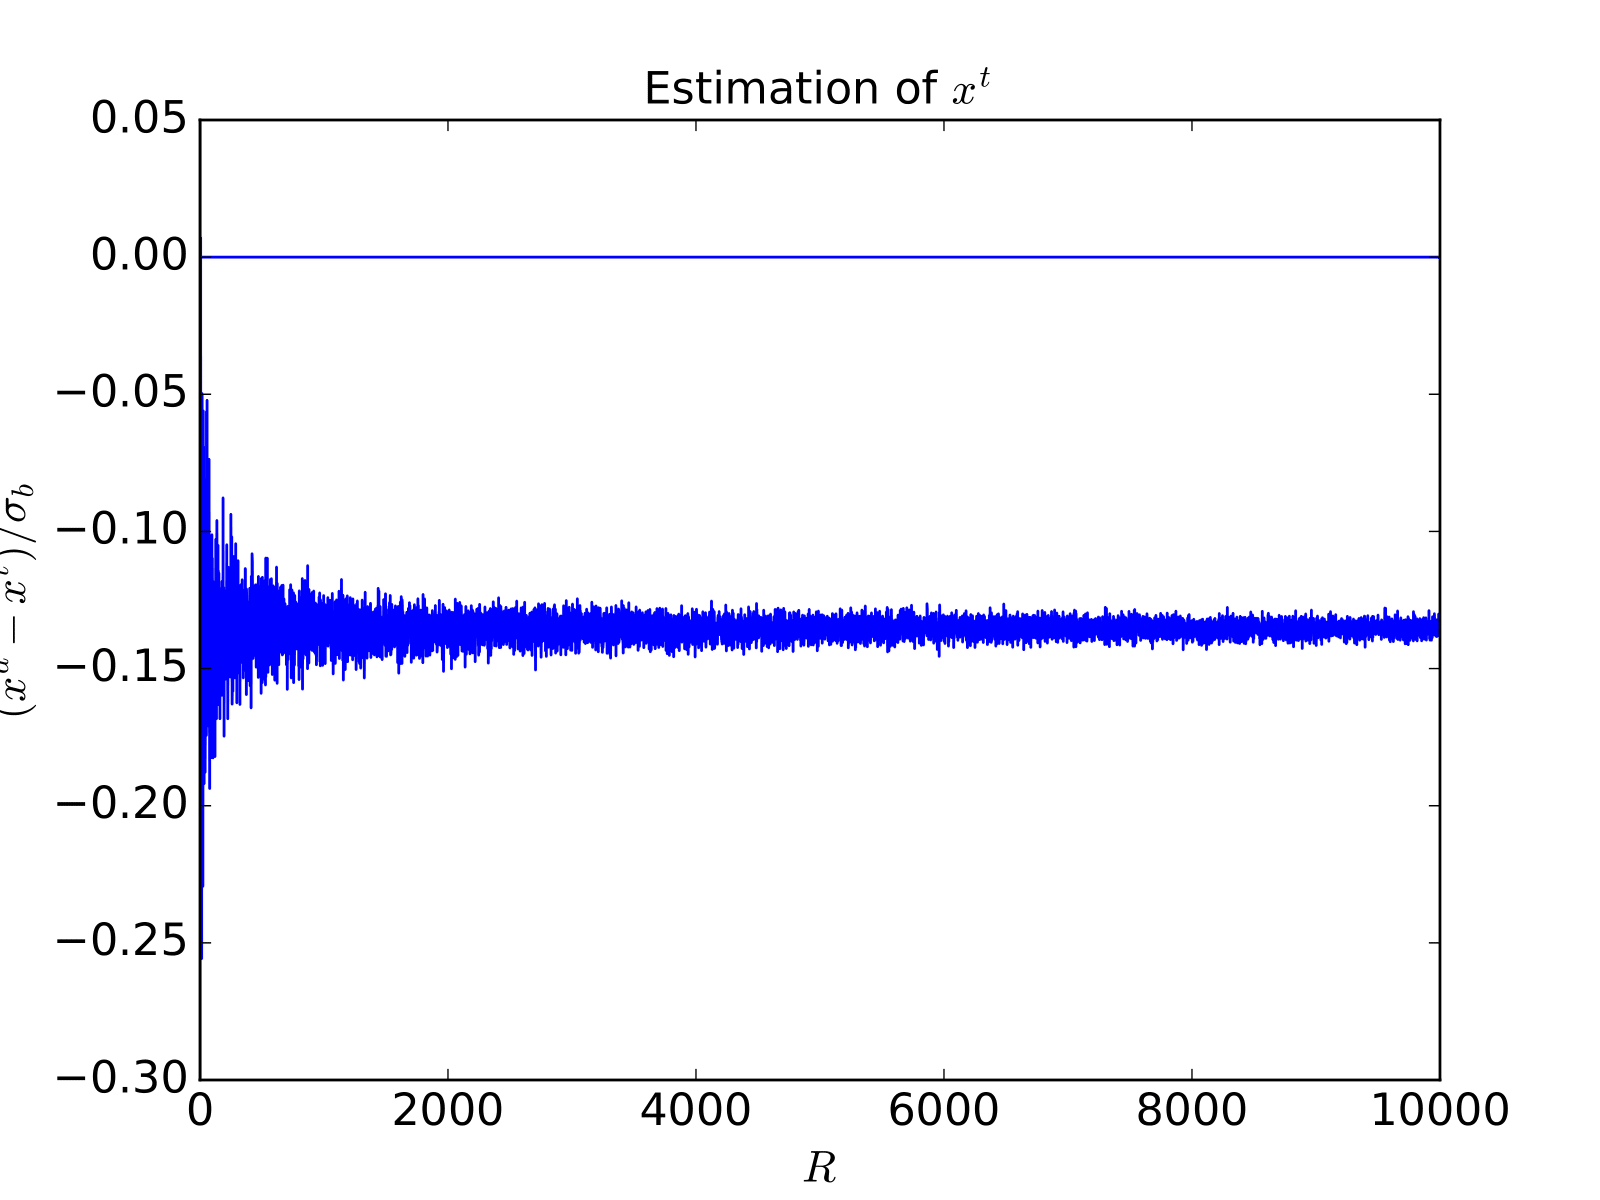

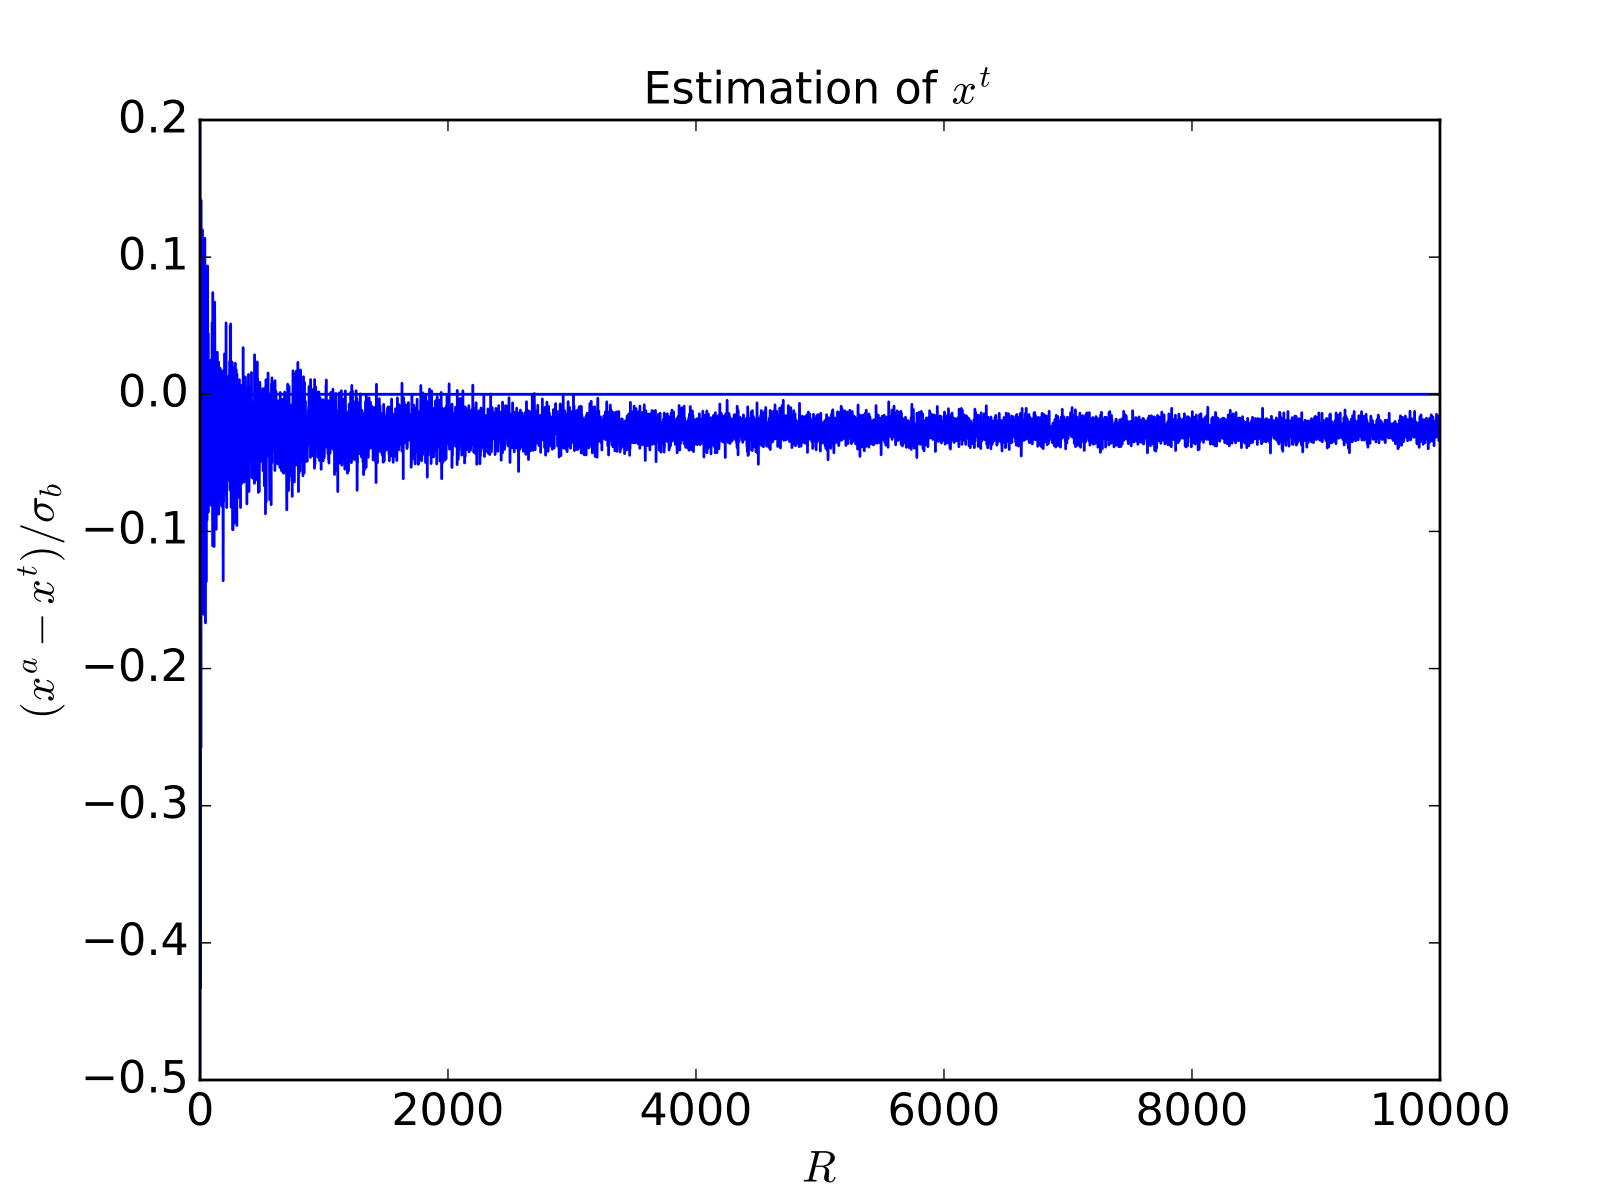

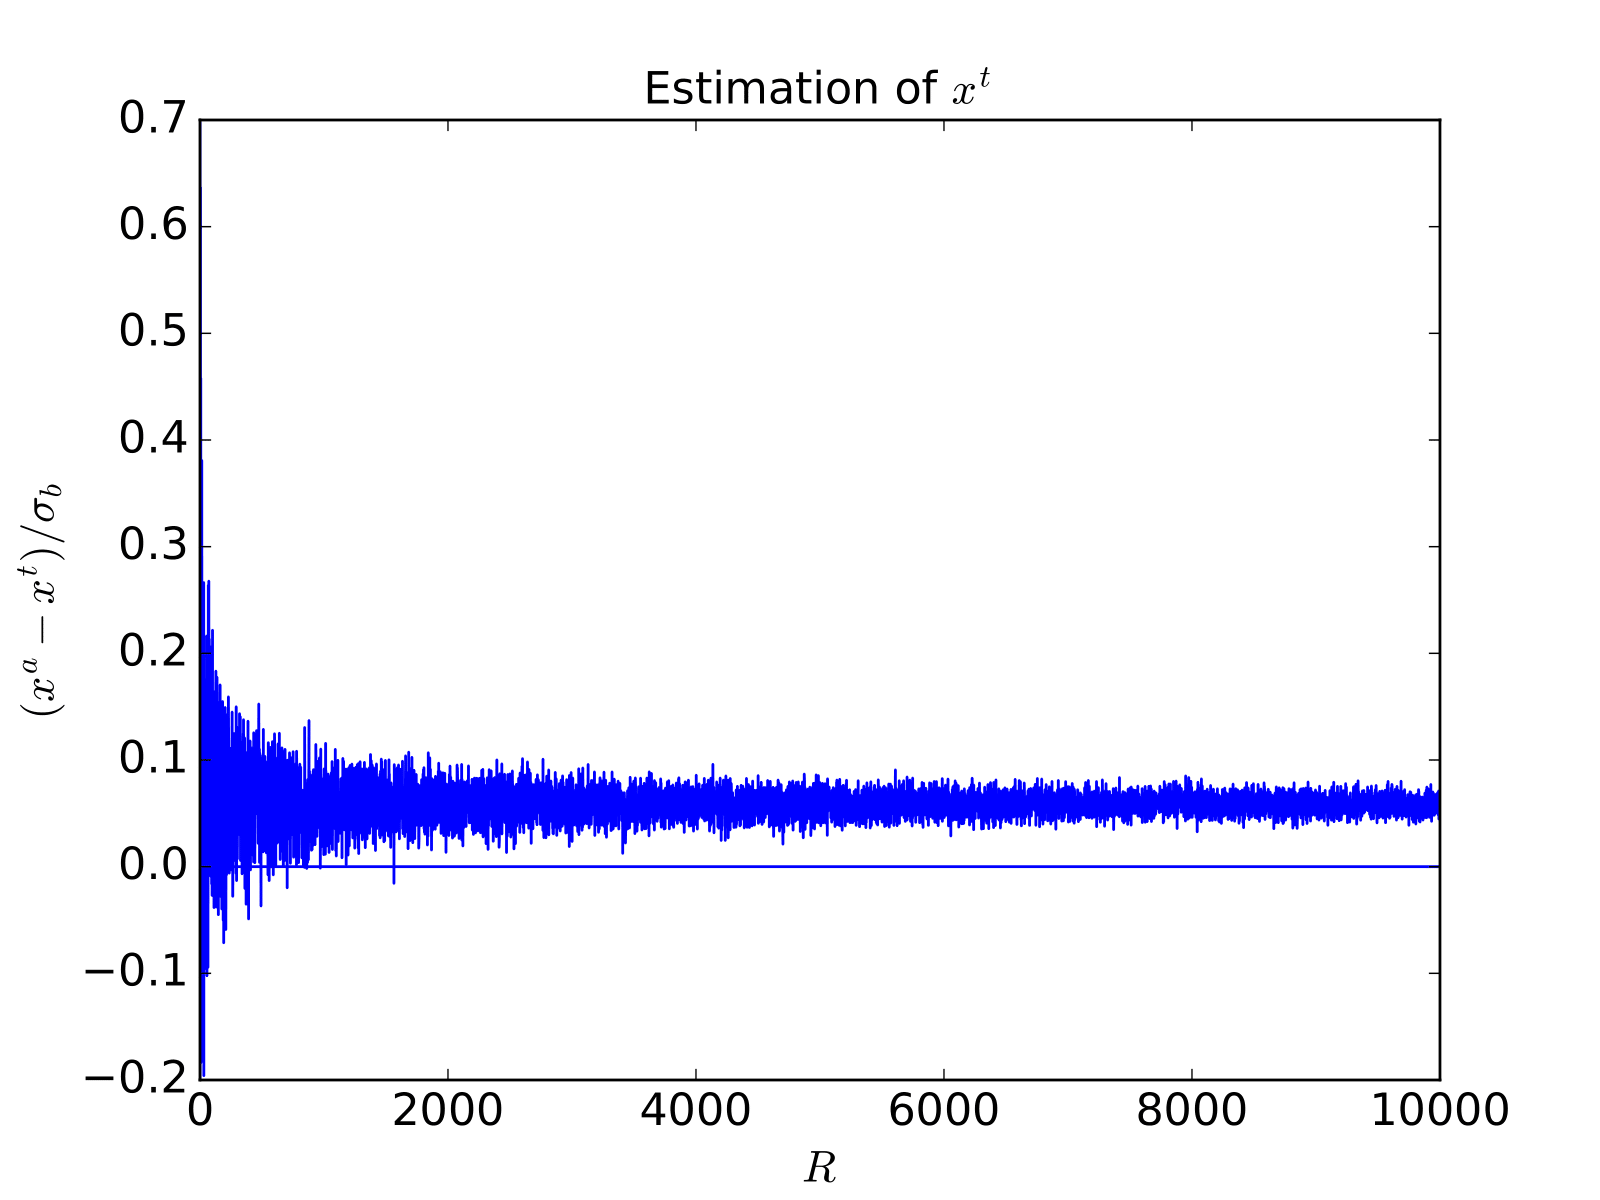

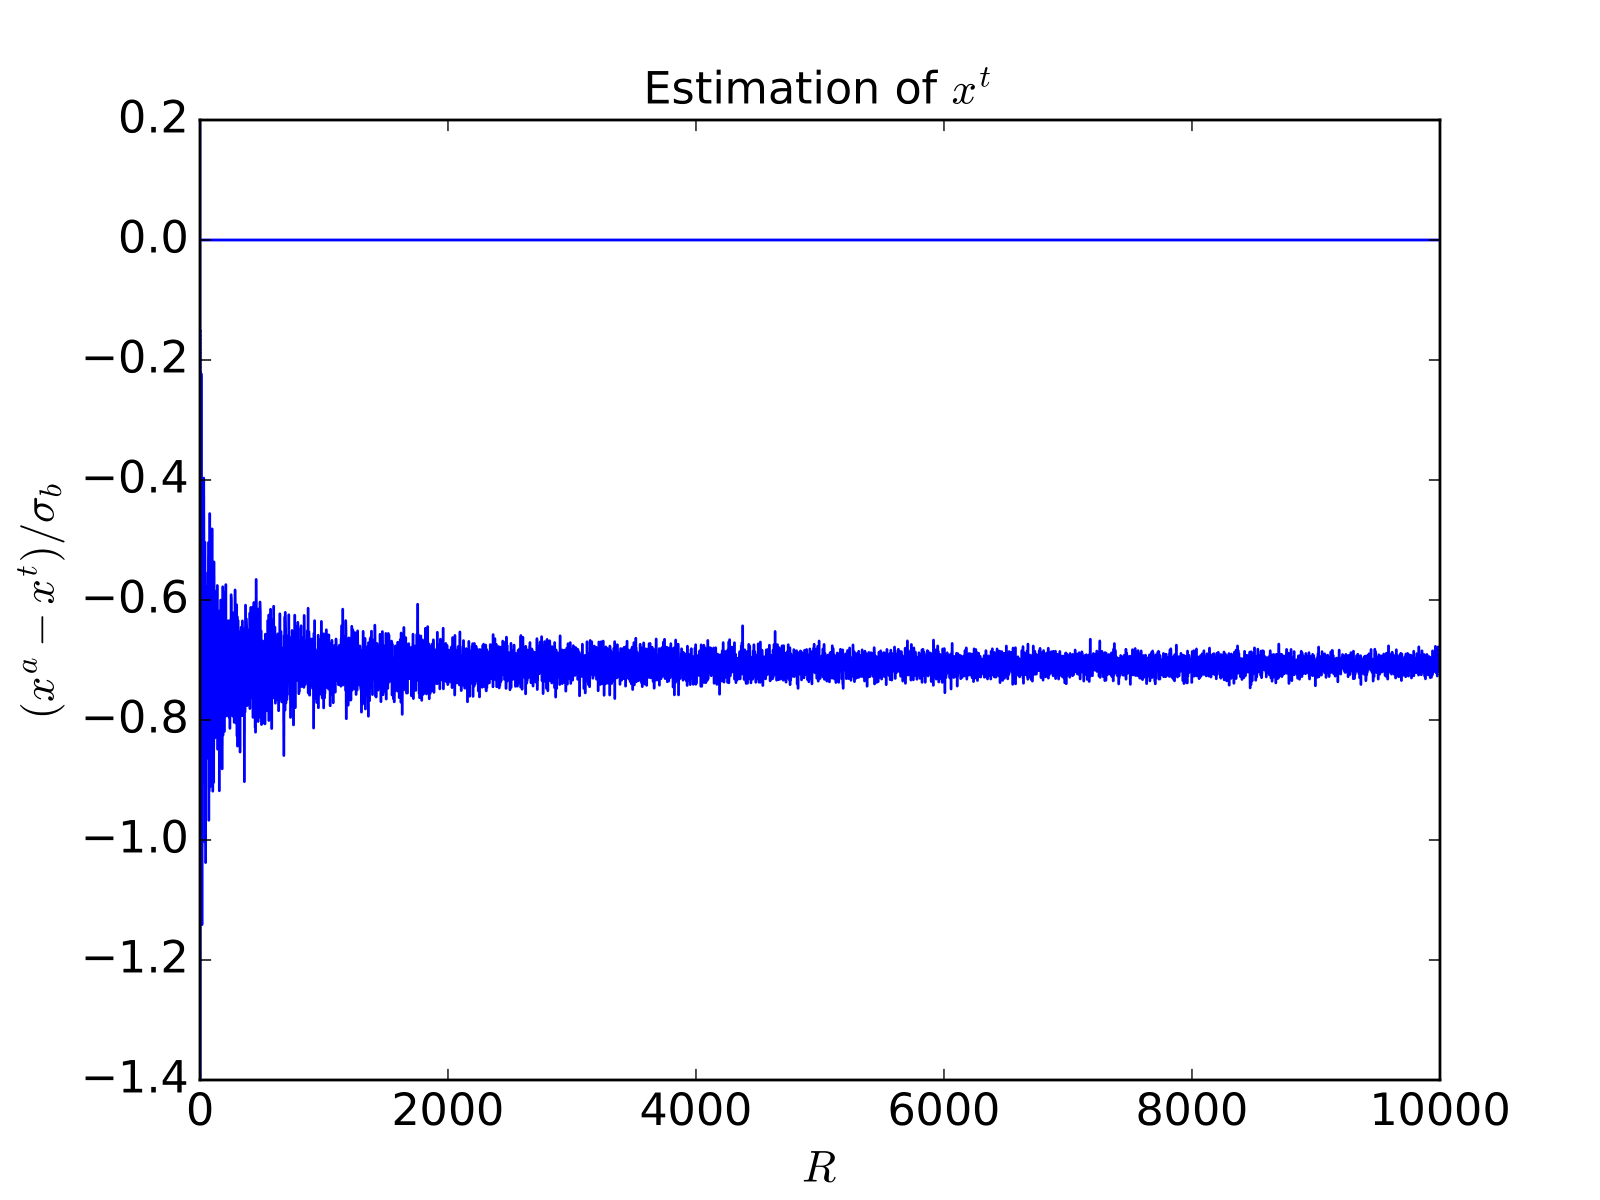

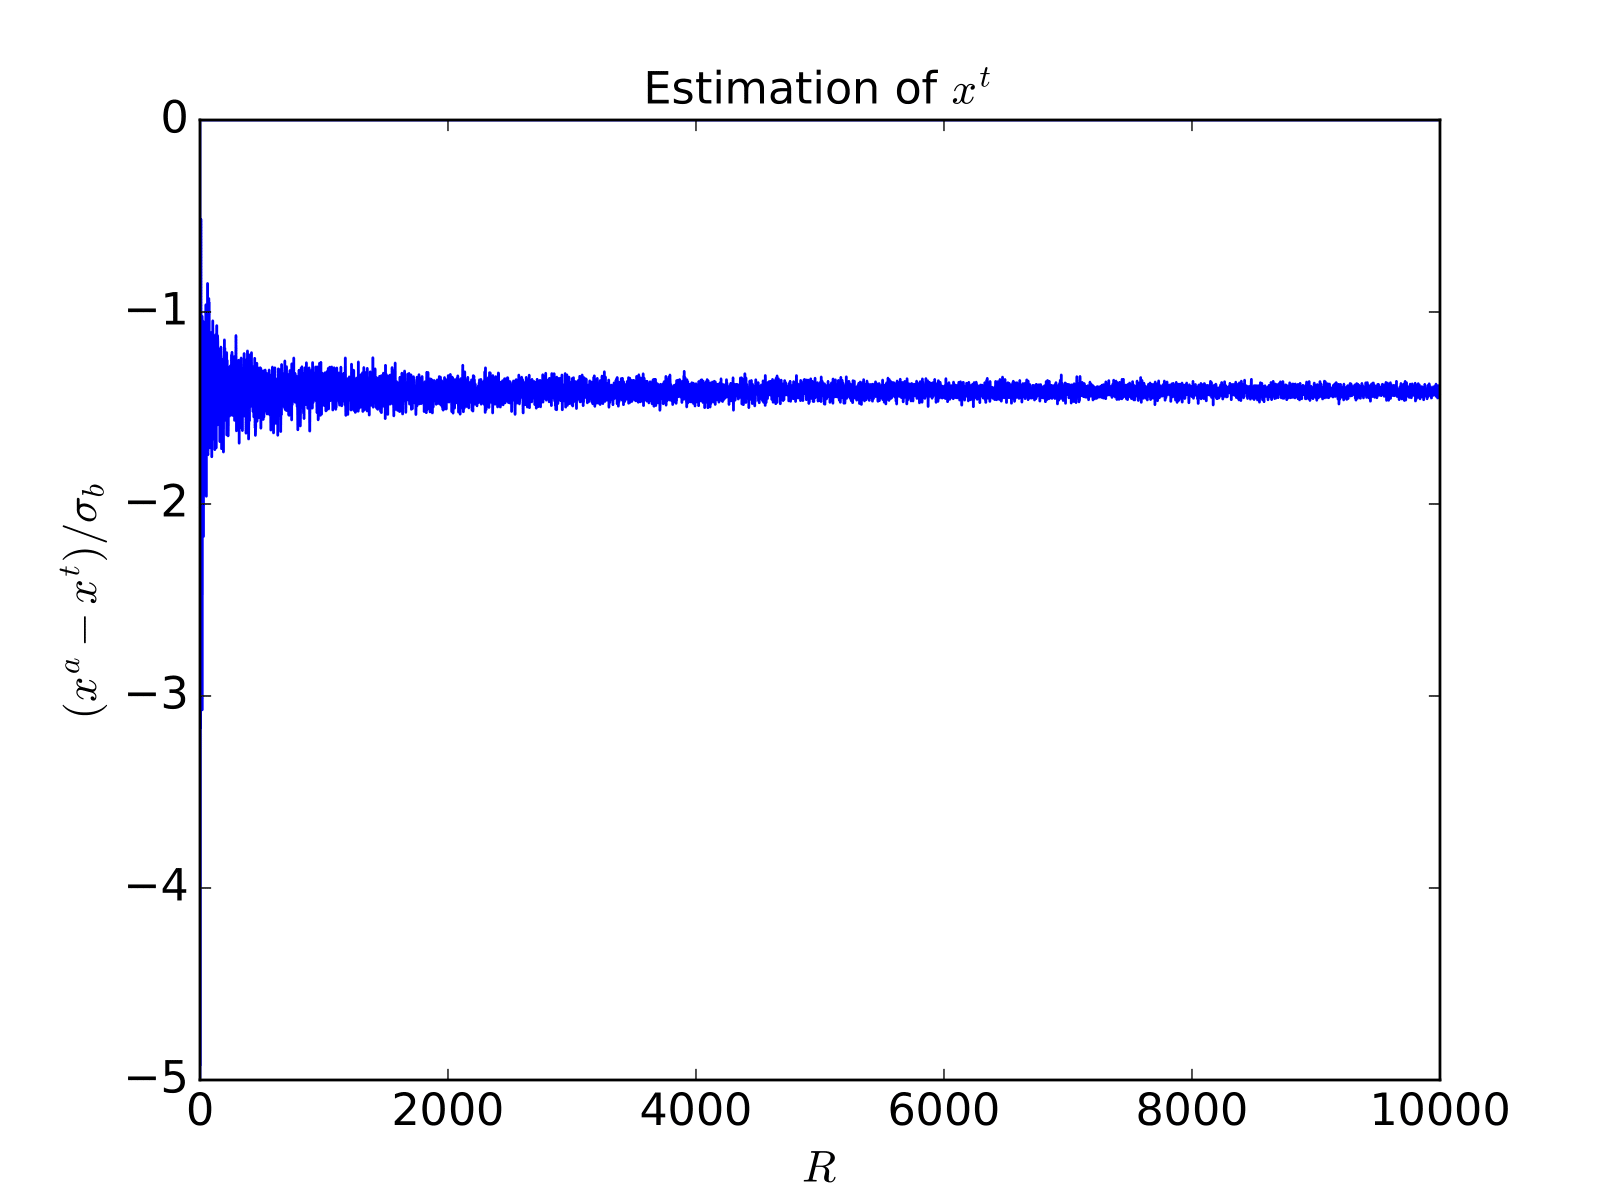

Lorsque que l'on augmente σb, on s'éloigne de l'état vrai, ce qui est cohérent car on disperse plus les valeurs.Cependant, pour σr il semblerait que pour une valeur intermédiaire on se rapproche plus du vrai état.

Enfin, on affiche la variation relative de variance issue de l'analyse par rapport à celle du "background" en fonction du nombre de réalisations. Pour comparer différentes situations, on fait varier les variance σb et σr:

Cas 1 : σb = 1 et σr = 1 

Cas 2 : σb = 1 et σr = 5 

Cas 3 : σb = 1 et σr = 10 

Cas 4 : σb = 5 et σr = 1 

Cas 5 : σb = 10 et σr = 1 

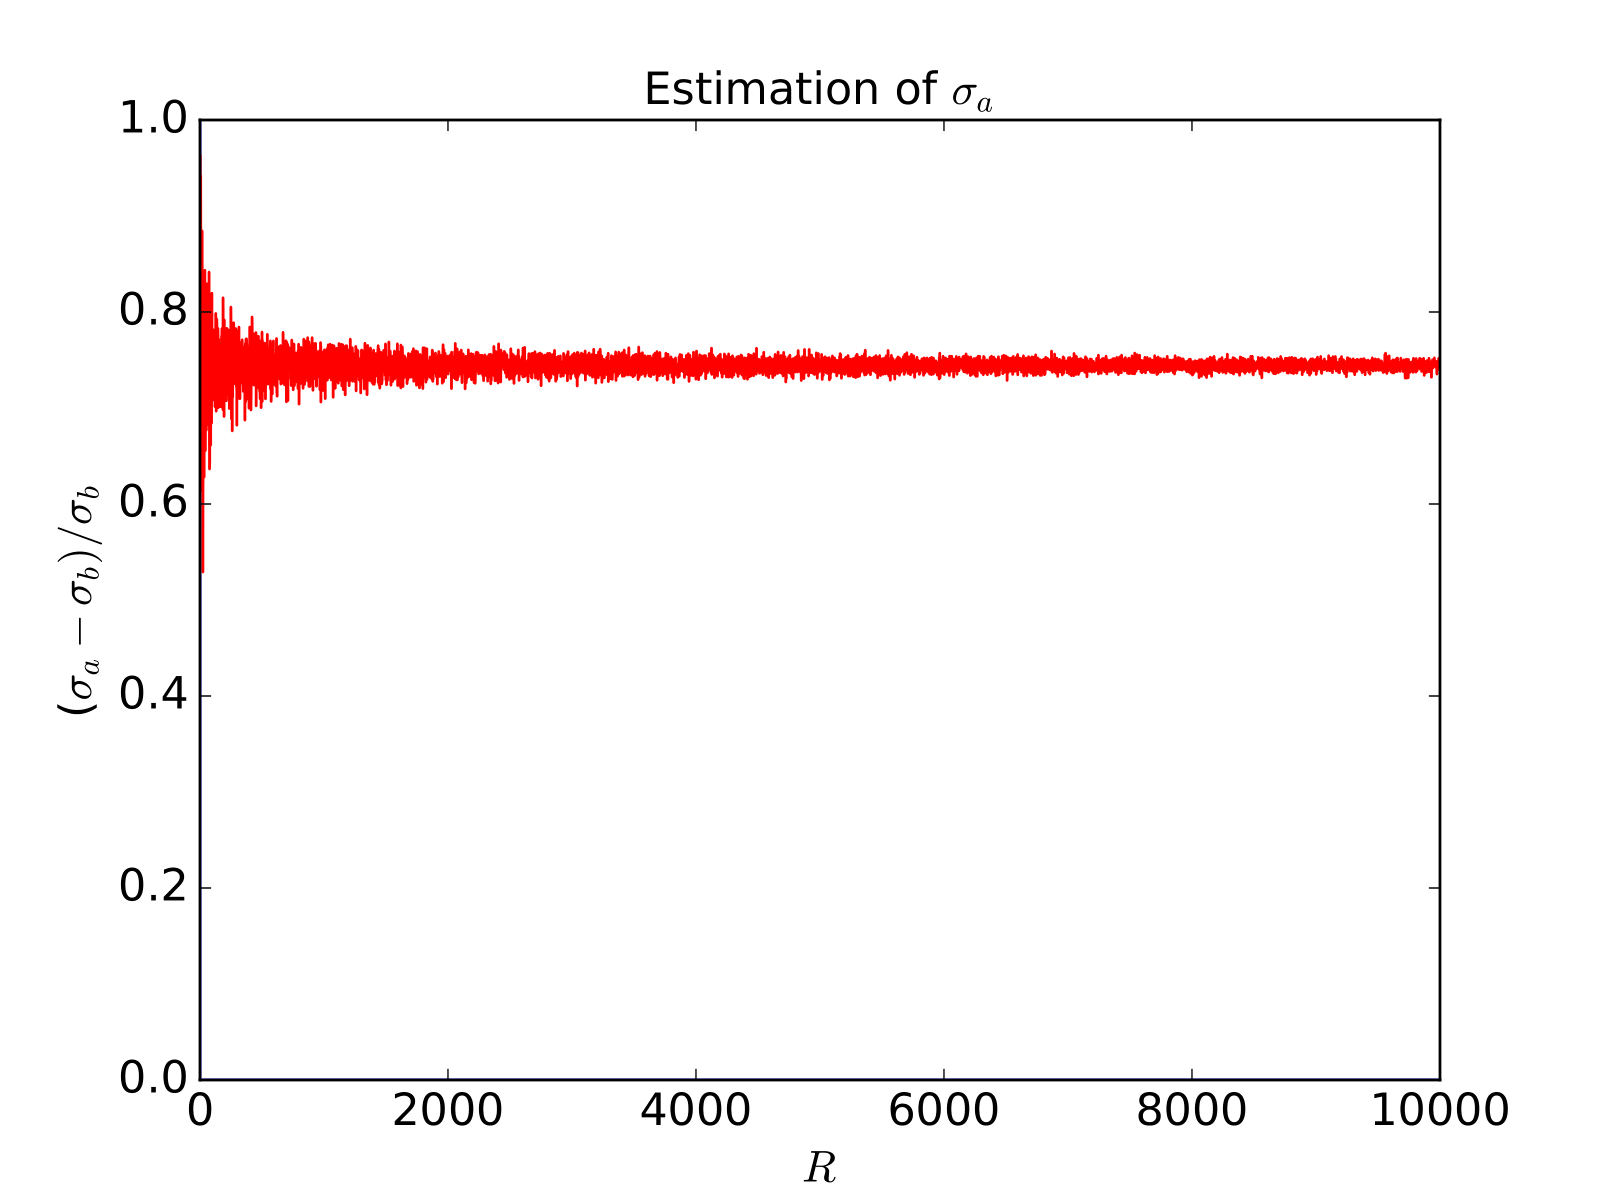

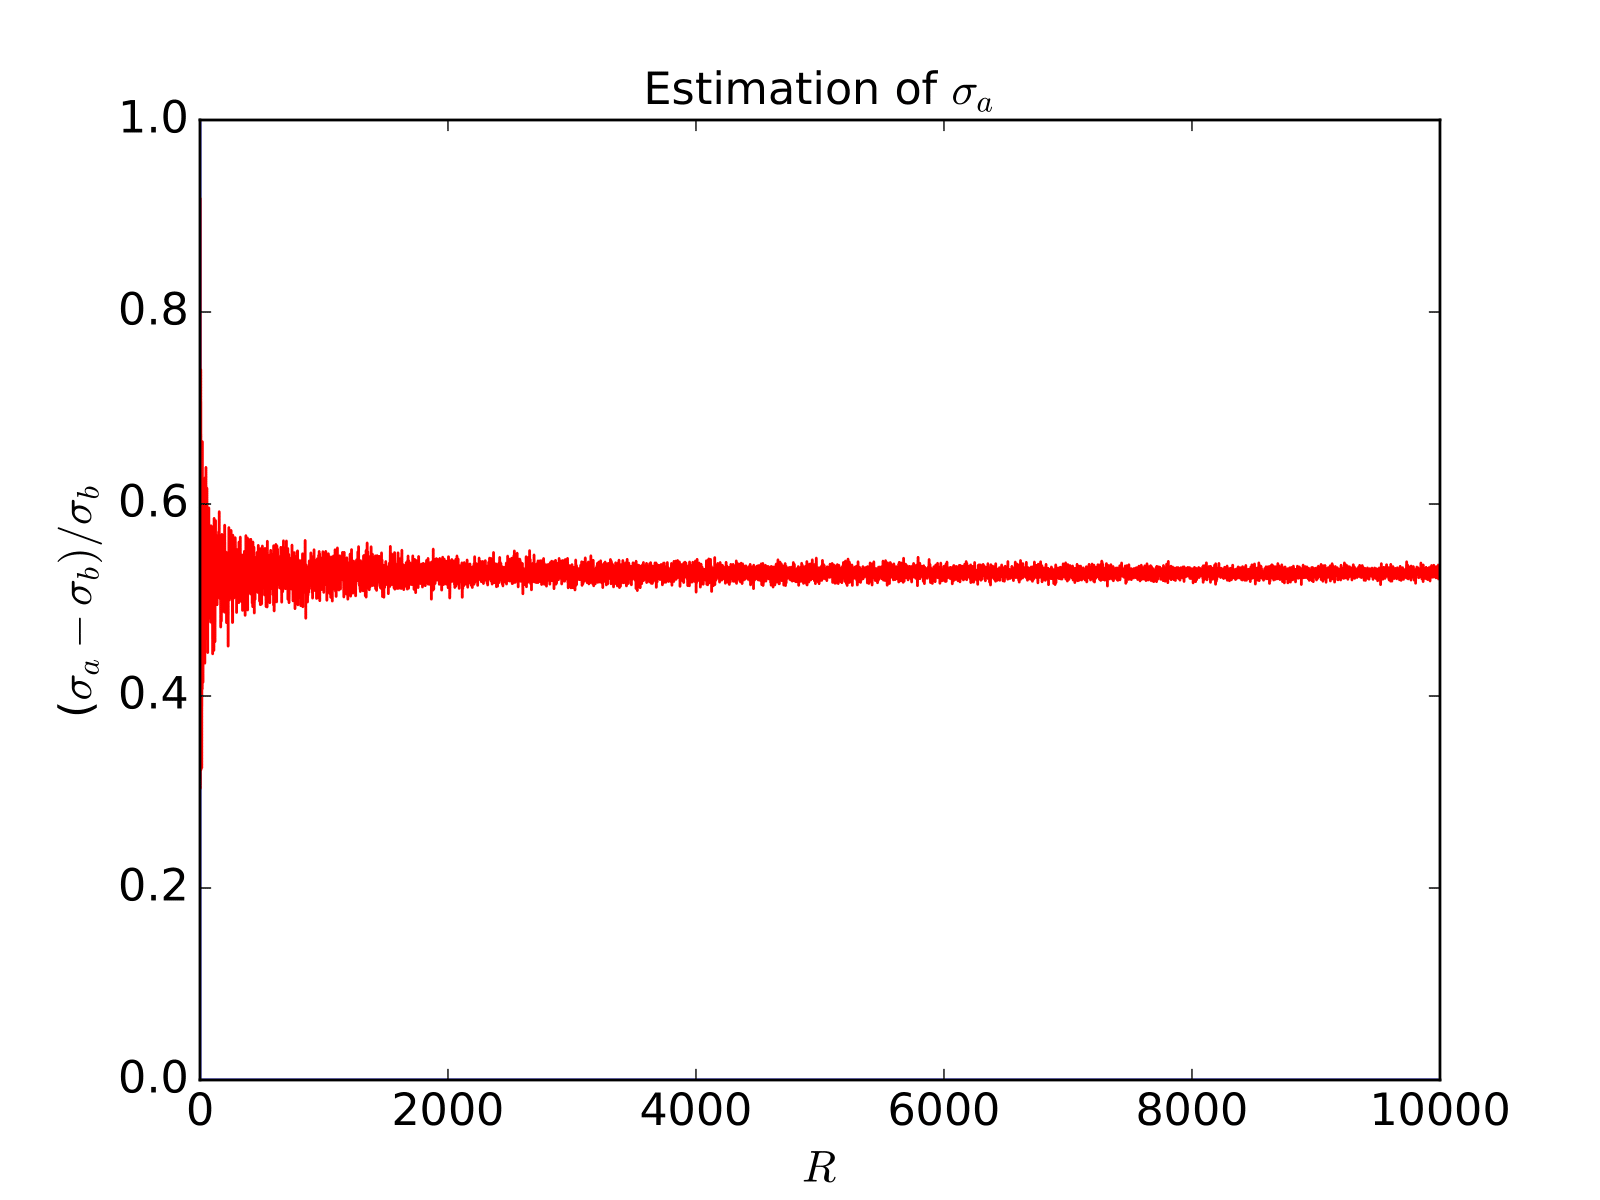


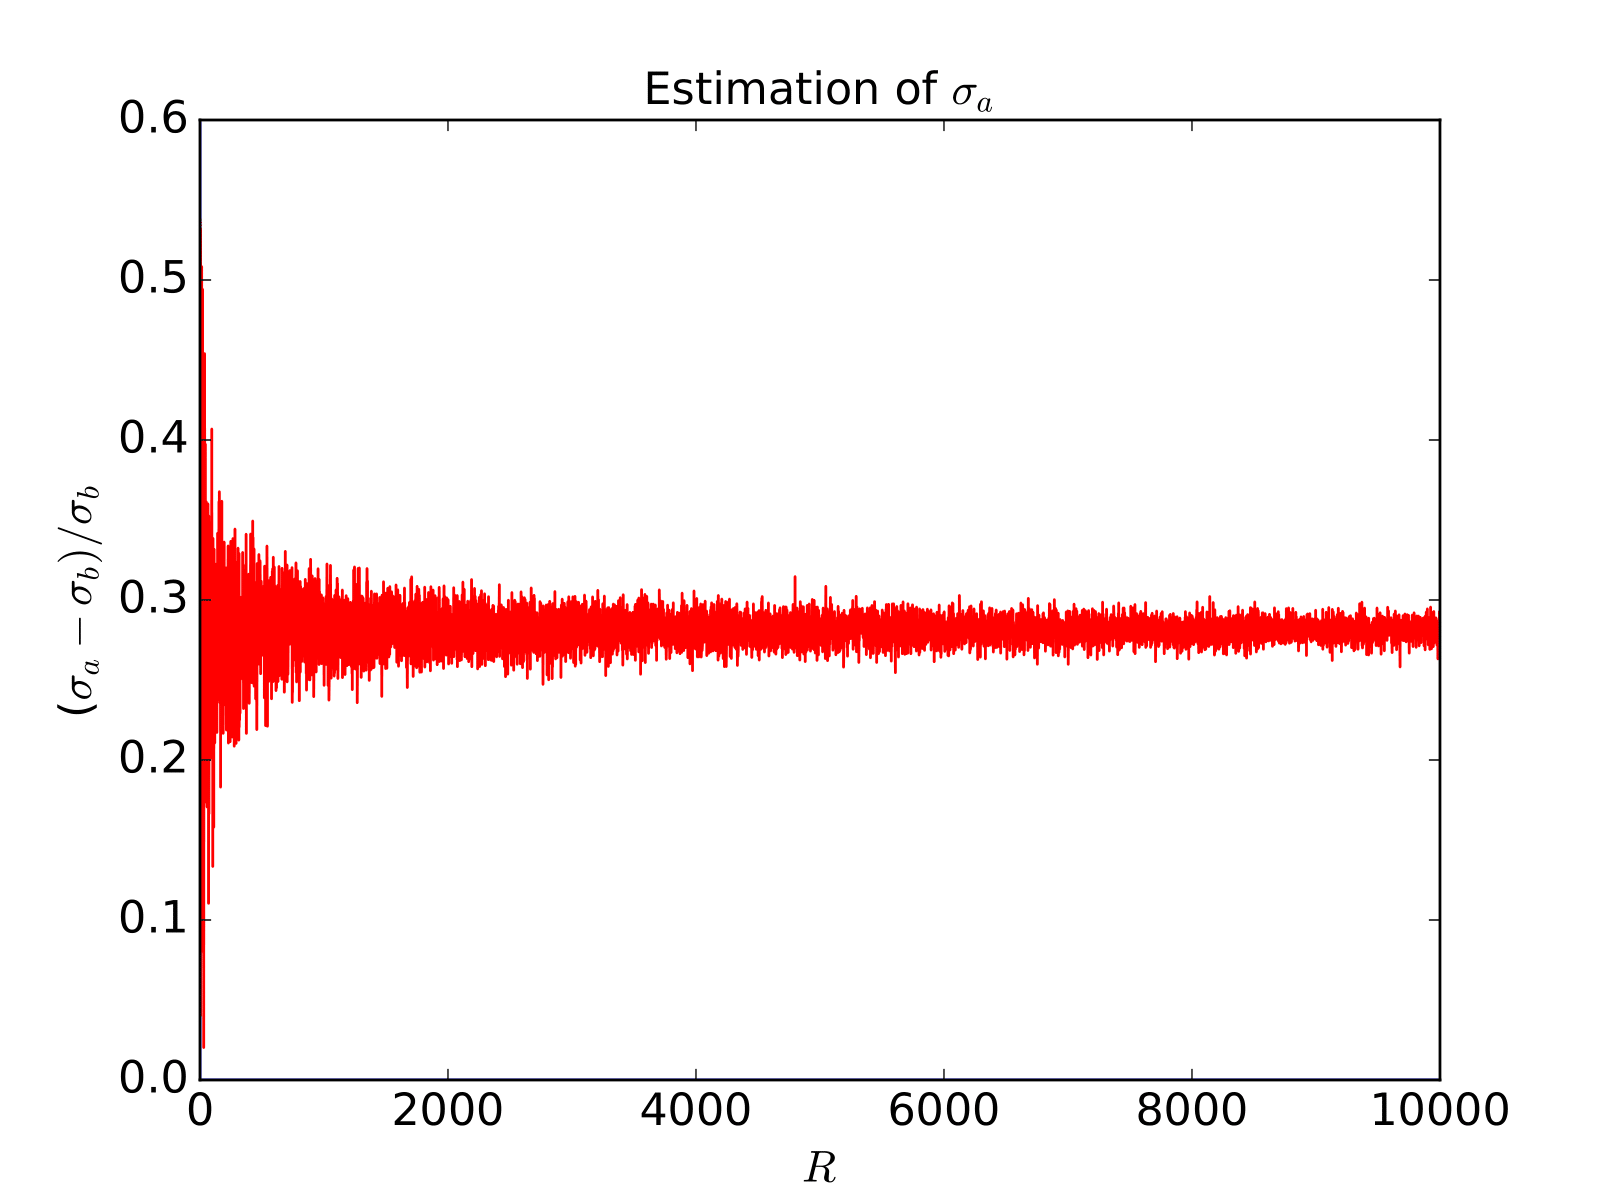

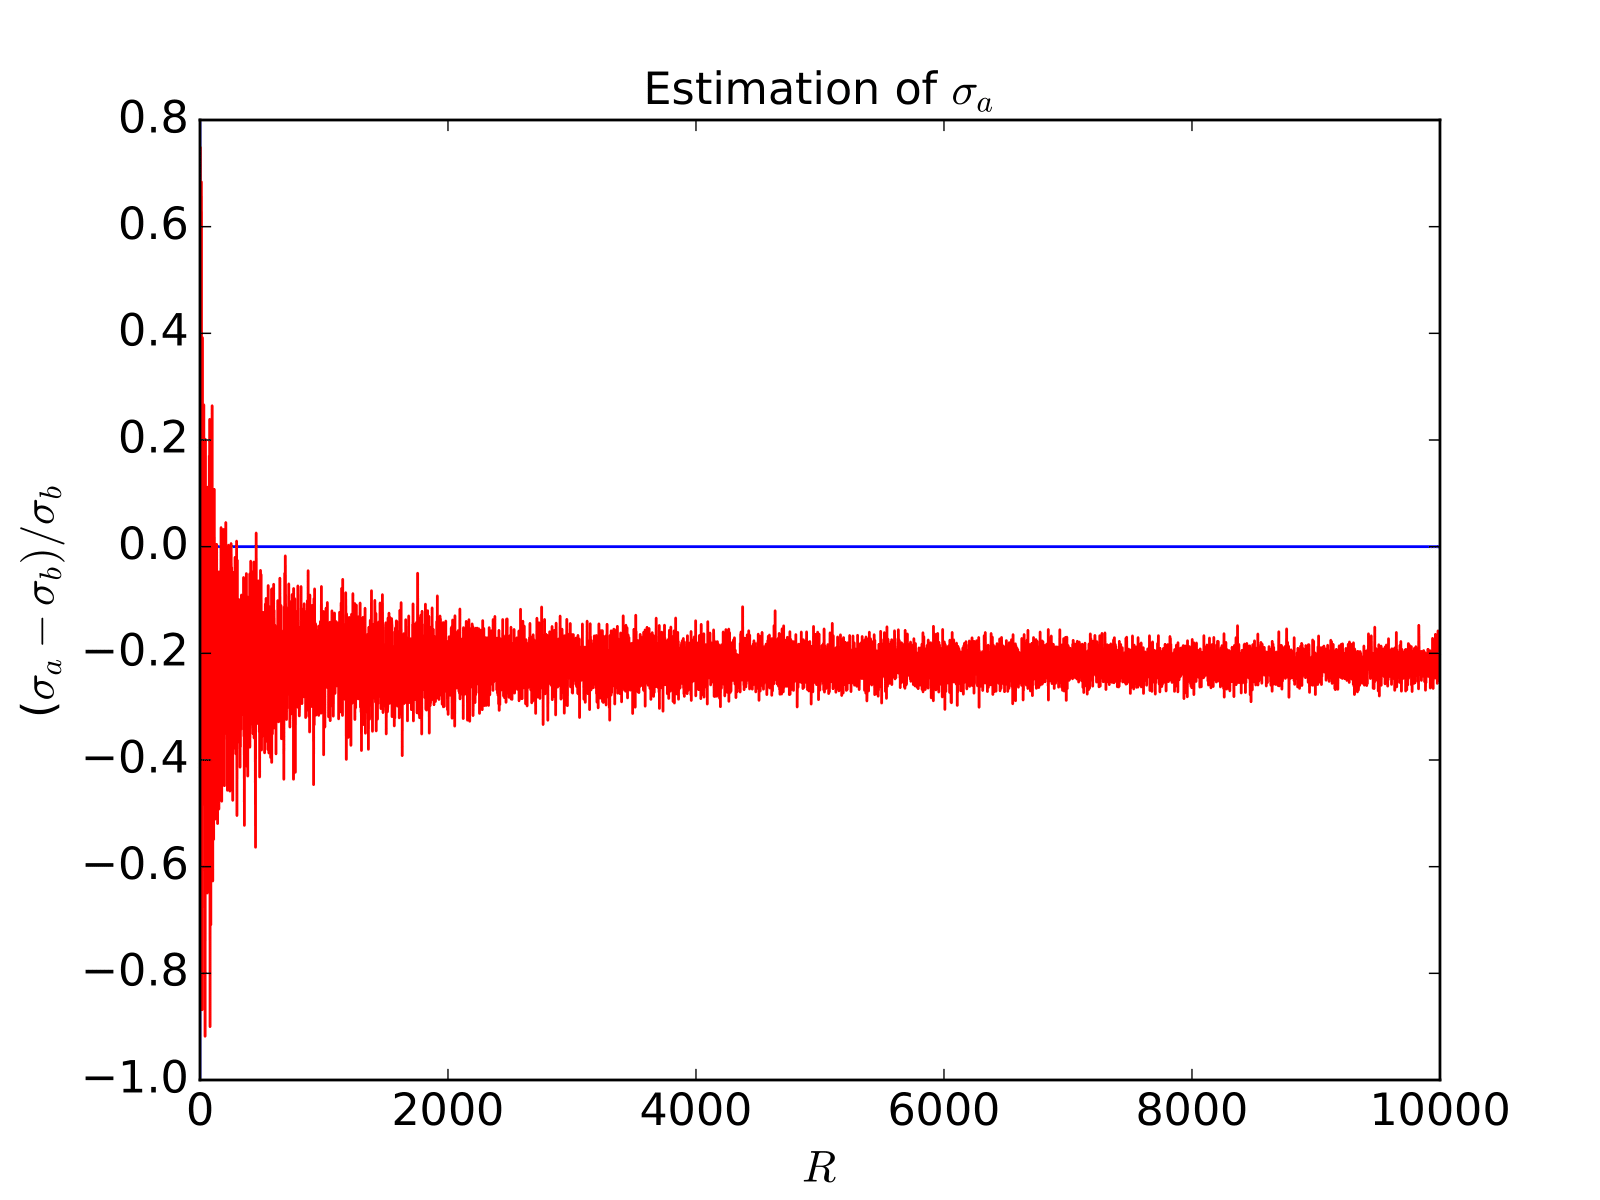

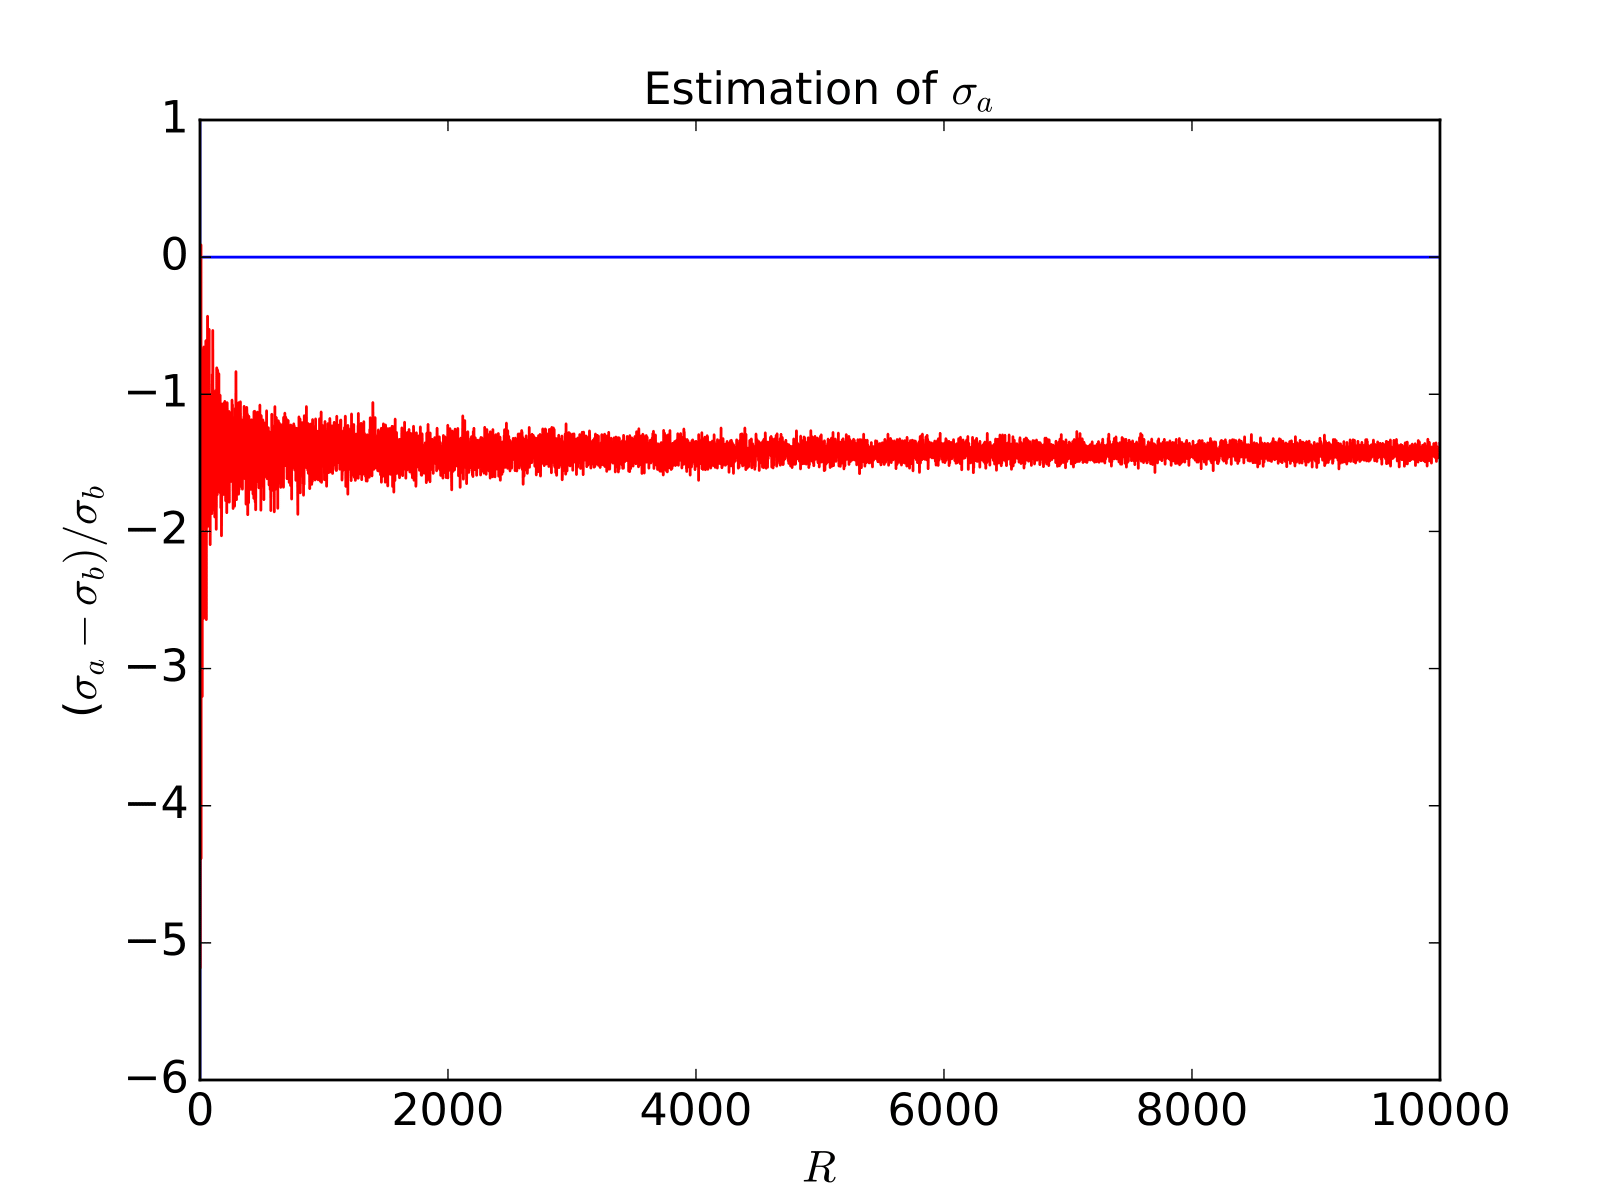